In [1]:
%matplotlib inline

import numpy as np
import numba

import matplotlib.pylab as plt
import matplotlib.cm as cm
from IPython.display import HTML

from read_worm import _h_curvature, _h_eigen_projections, _h_lengths

data = np.load('worm_example.npz')
skeletons = data['skeleton']
dorsal_contours = data['dorsal_contour']
ventral_contours = data['ventral_contour']


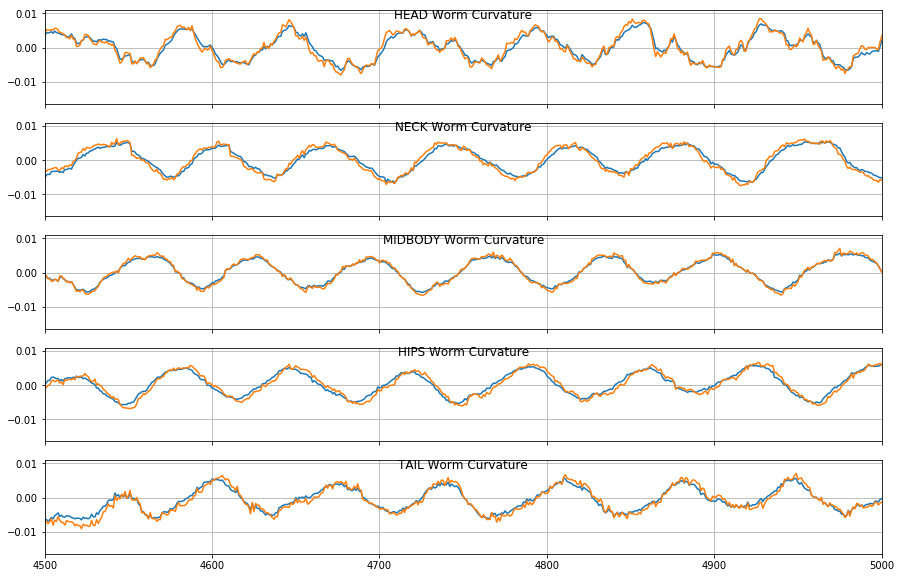

In [2]:
segments_ind_dflt = {
    'head' : 0,
    'neck' : 0.25,
    'midbody' : 0.5, 
    'hips' : 0.75,
    'tail' : 1.,
}

xlim = (4500, 5000)

f, axs = plt.subplots(len(segments_ind_dflt), sharex=True, sharey=True, figsize = (15, 10))

skel_lengths = _h_lengths(skeletons)
for points_window in [5, 4]:#range(4, 6):
    curvatures = _h_curvature(skeletons, points_window, lengths=None)
    
    max_angle_index = curvatures.shape[-1]-1
    segments_ind = {k:int(round(x*max_angle_index)) for k,x in segments_ind_dflt.items()}

    for ax, (p, ind) in zip(axs, segments_ind.items()):  
        ax.plot(curvatures[:, ind]) 
        ax.set_title(p.upper() + ' Worm Curvature', y=0.85)
        ax.grid('on')
    plt.xlim(xlim)

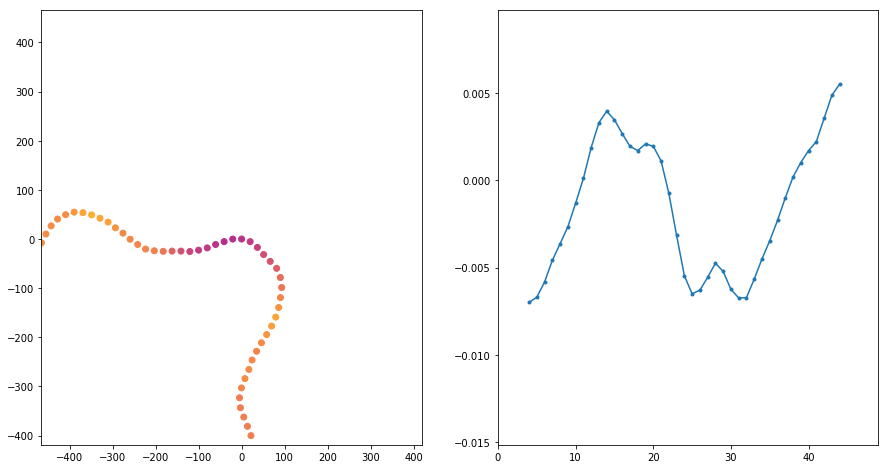

In [39]:
from velocities import _h_ax_range
import matplotlib.cm as cm
from matplotlib import animation

ini_t = 3000
fin_t = 3210

skel_a = skeletons[ini_t:fin_t]
skel_a = skel_a - skel_a[:, 25, :][:, None, :]
angs = curvatures[ini_t:fin_t]

x_angles = np.arange(angs.shape[1]) + points_window

x_range, y_range = _h_ax_range(skel_a)
fig = plt.figure(figsize = (15, 8))
ax_skels = plt.subplot(1,2,1)

ax_bends = plt.subplot(1,2,2)
l_bends, = ax_bends.plot([], [], '.-')
ax_bends.set_xlim(0, angs.shape[1] + 2*points_window)

curv_range = (np.nanmin(curvatures), np.nanmax(curvatures))
ax_bends.set_ylim(curv_range)

#animation function. This is called sequentially
def _animate(i):
    x = skel_a[i, :, 0]
    y = skel_a[i, :, 1]
    curv = curvatures[i]
    /
    curv_n = (curv-curv_range[0])/(curv_range[1] - curv_range[0])
    curv_n = np.pad(curv_n, (points_window,points_window), 'edge')
    c = cm.plasma(curv_n)
    
    ax_skels.clear()
    ax_skels.scatter(x, y, c=c)
    ax_skels.set_xlim(*x_range)
    ax_skels.set_ylim(*y_range)
    
    l_bends.set_data(x_angles, angs[i])
    return l_bends,


# call the animator. blit=True means only re-draw the parts that have changed.
tot = skel_a.shape[0]
anim = animation.FuncAnimation(fig, 
                               _animate,
                               interval=50, 
                               frames = tot,
                               blit=True);
HTML(anim.to_html5_video())

(7505, 49)


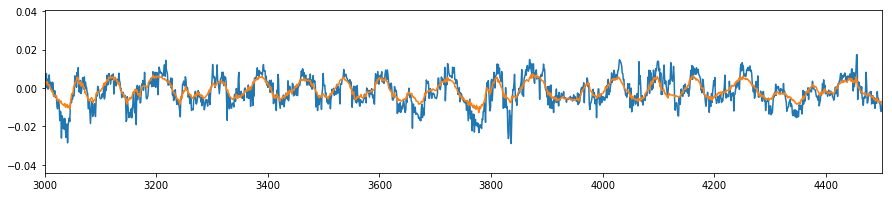

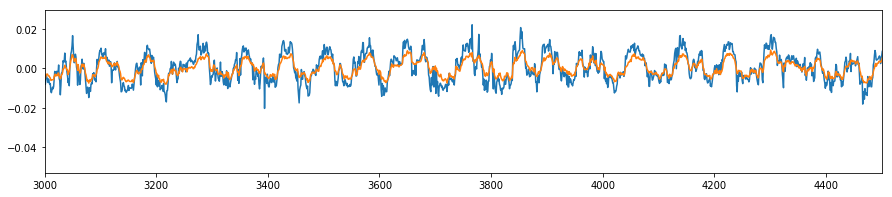

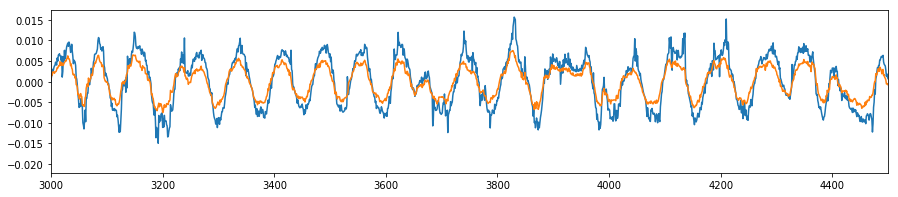

In [5]:
from read_worm import _h_curvature_test

curvatures_fit = _h_curvature_test(skeletons)

xlim = (3000, 4500)

nn = points_window-1
mid = int(curvatures.shape[1]/2)

plt.figure(figsize = (15, 3))
plt.plot(curvatures_fit[:, -nn])
plt.plot(curvatures[:, -1]) 
plt.xlim(xlim)

plt.figure(figsize = (15, 3))
plt.plot(curvatures_fit[:, nn])
plt.plot(curvatures[:, 0]) 
plt.xlim(xlim)

plt.figure(figsize = (15, 3))
plt.plot(curvatures_fit[:, 25])
plt.plot(curvatures[:, mid]) 
plt.xlim(xlim)

print(curvatures_fit.shape)

(41,)
(49,)


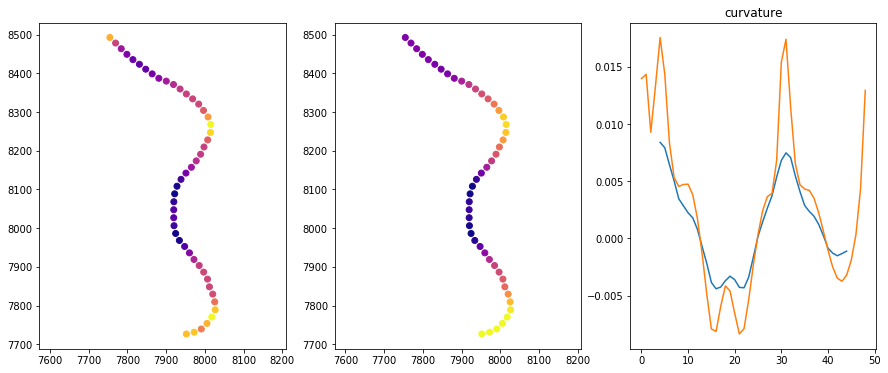

In [32]:
t = 2500
skel = skeletons[t]
curv_f = curvatures_fit[t]
curv = curvatures[t]

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
x = skel[:, 0]
y = skel[:, 1]
curv_range = (np.nanmin(curv_f), np.nanmax(curv_f))
curv_n = (curv_f - curv_range[0])/(curv_range[1] - curv_range[0])
c = cm.plasma(curv_n)
plt.scatter(x, y, c=c)
plt.axis('equal')

plt.subplot(1,3,2)
x = skel[:, 0]
y = skel[:, 1]
curv_range = (np.nanmin(curv), np.nanmax(curv))
curv_n = (curv - curv_range[0])/(curv_range[1] - curv_range[0])
curv_n = np.pad(curv_n, (points_window,points_window), 'edge')
c = cm.plasma(curv_n)
plt.scatter(x, y, c=c)
plt.axis('equal')

plt.subplot(1,3,3)
plt.plot(np.arange(curv.size) + points_window, curv)
plt.plot(curv_f)
plt.title('curvature')

print(curv.shape)
print(curv_f.shape)



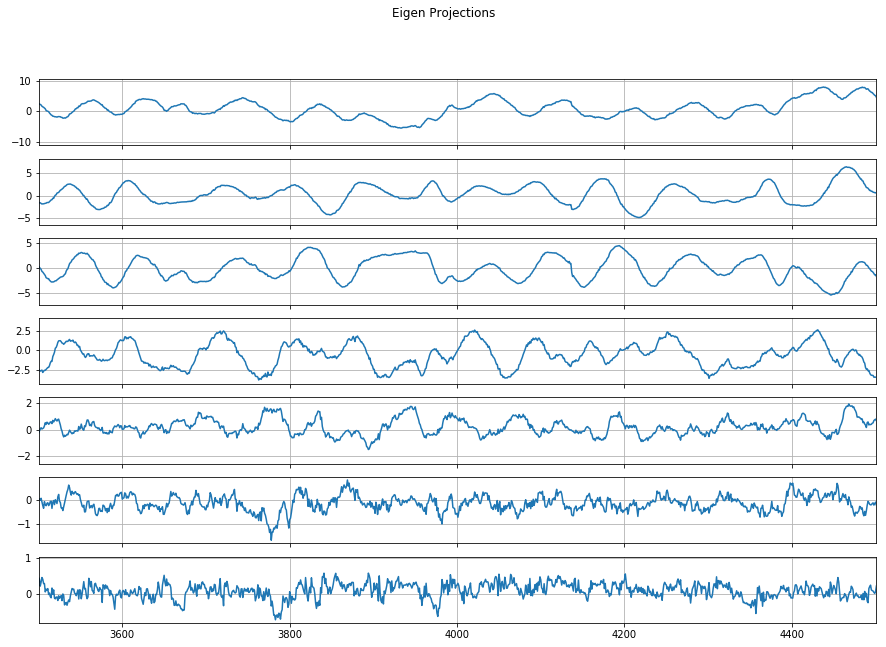

In [35]:
eigen_projections = _h_eigen_projections(skeletons)


xlim = (3500, 4500)

f, axs = plt.subplots(eigen_projections.shape[1], sharex=True, figsize = (15, 10))

for ii, ax in enumerate(axs):  
    ax.plot(eigen_projections[:, ii])
    ax.grid('on')
plt.xlim(xlim)
plt.suptitle('Eigen Projections')

(4978.3018694196426,
 8008.7717912946409,
 7693.2753766741062,
 9131.8792550223206)

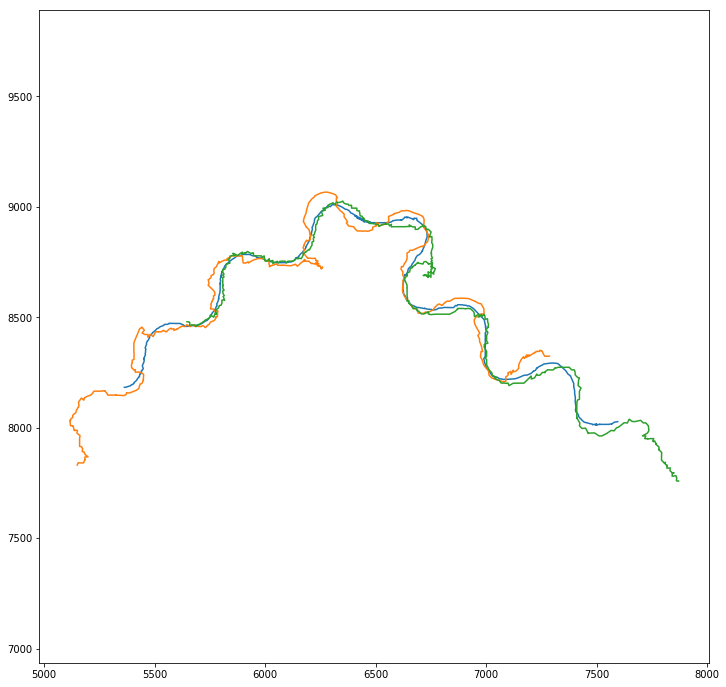

In [33]:
tt = np.arange(3000, 3500)

ext_ind = 1

plt.figure(figsize=(12,12))
plt.plot(skeletons[tt, 25, 0], skeletons[tt, 25, 1])
plt.plot(skeletons[tt, ext_ind-1, 0], skeletons[tt, ext_ind-1, 1])
plt.plot(skeletons[tt, -ext_ind, 0], skeletons[tt, -ext_ind, 1])
plt.axis('equal')

In [8]:
plt.plot(bend_angles[:, -5])
plt.plot(bend_angles[:, -3])


NameError: name 'bend_angles' is not defined